## IIIFnotebook tutorial
This notebook explain the features of `iiifnotebook`.

The main purpuse of iiifnotebook is to allow the image processing of IIIF resources, however the correct attribution and the metadata are important components during research hence the module try to reproduce a similar experience of the classical IIIF viewers. 

To use the interactive mode activate the `%matplotlib notebook` back-end before using `iiifnotebook`:

In [1]:
%matplotlib notebook

Now import the iiif notebook module:

In [3]:
import iiifnotebook

# Creating an iiifnotebook instance
For starting using iiifnotebook the user must create an instance of a IIIFviewer providing the manifest url as the parameter. 
The IIIFviewer allow the user to interact with the manifest the `Controls` tab allows to change canvas, the image is downloaded from the server with the dimension provided in the `Preview` field:

<IPython.core.display.Javascript object>


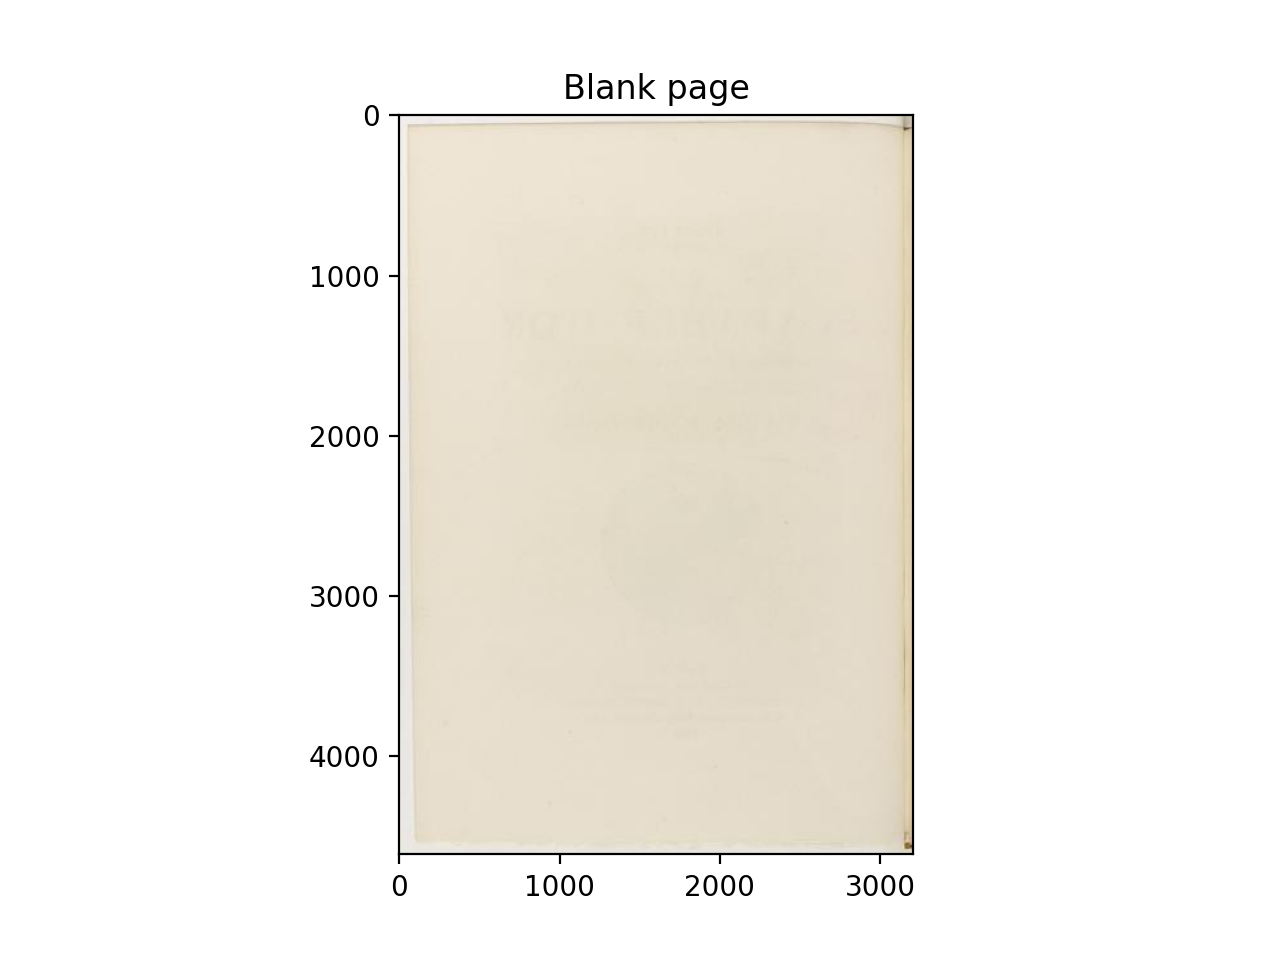

updated xlims:  (-0.5, 3203.5)
updated ylims:  (4612.5, -0.5)


In [80]:
r0009 = iiifnotebook.IIIFviewer('https://iiif.io/api/cookbook/recipe/0009-book-1/manifest.json')

https://iiif.io/api/cookbook/recipe/0230-navdate/

## Extracting regions and analyzing them
One of the main feature of iiifnotebook is to extract a region of interest that can be analyzed using image processing techniques. 
The user can drag a region in the main window then add a comment and save the ROI using the button in the controls panel.

<IPython.core.display.Javascript object>


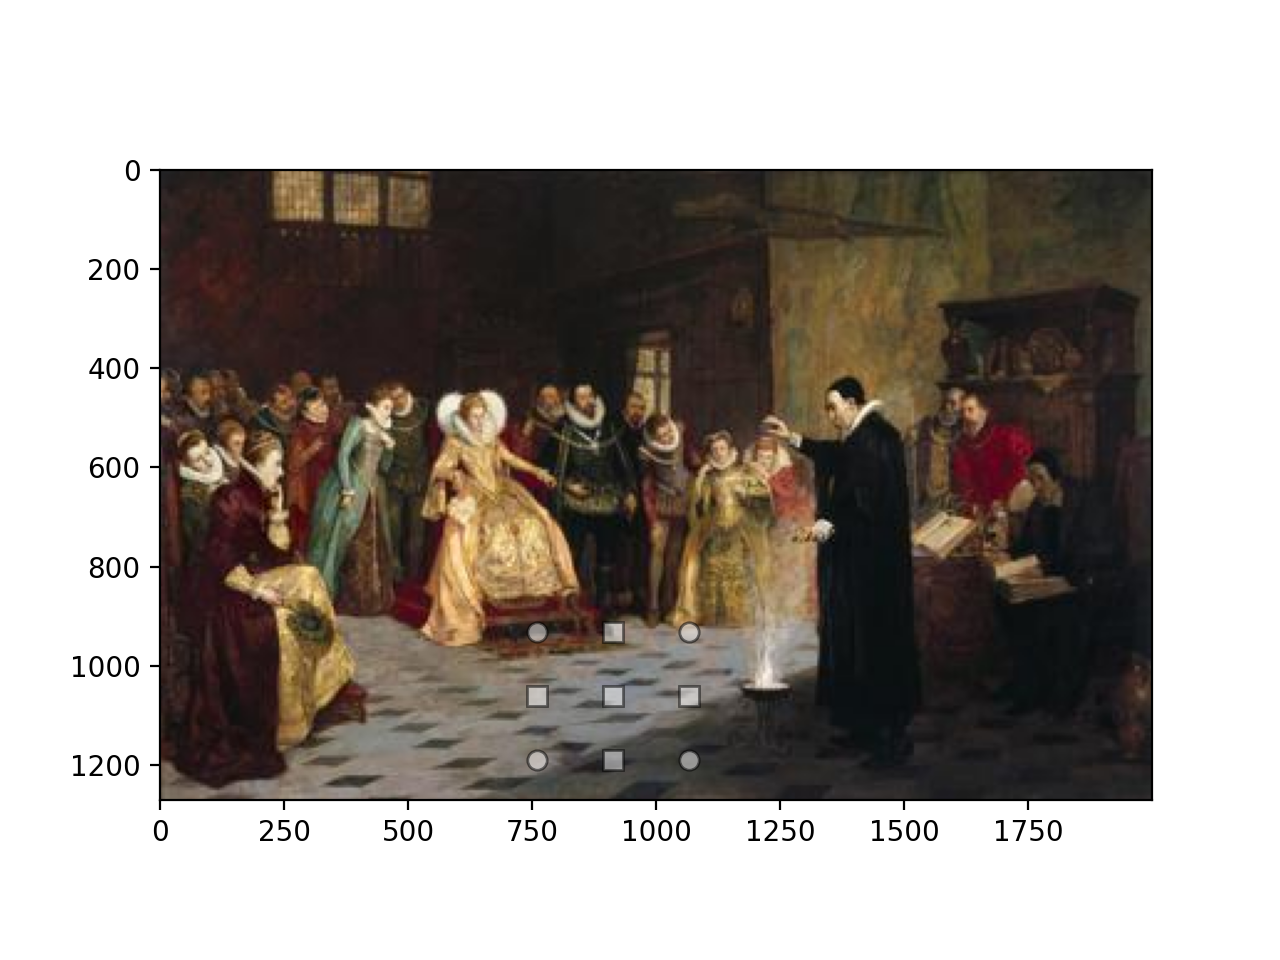

updated xlims:  (-0.5, 1999.5)
updated ylims:  (1270.5, -0.5)


In [81]:
r0033  = iiifnotebook.IIIFviewer("https://iiif.io/api/cookbook/recipe/0033-choice/manifest.json")

We can then retrieve the urls of the region we selected:

In [82]:
r0033.get_lastRoiUrlChoices()


['https://iiif.io/api/image/3.0/example/reference/421e65be2ce95439b3ad6ef1f2ab87a9-dee-natural/pct:38.01,73.29,15.32,20.3/max/0/default.jpg',
 'https://iiif.io/api/image/3.0/example/reference/421e65be2ce95439b3ad6ef1f2ab87a9-dee-xray/pct:38.01,73.29,15.32,20.3/max/0/default.jpg']

You can then use the urls to retrive the ROI:
![image info](https://iiif.io/api/image/3.0/example/reference/421e65be2ce95439b3ad6ef1f2ab87a9-dee-natural/pct:38.01,73.29,15.32,20.3/max/0/default.jpg)
Or you can request directly the stack.

In [7]:
data = r0033.get_lastRoiStack()

Once you get the data is easy to perform additional processing, fors instance show a false color image:

<IPython.core.display.Javascript object>


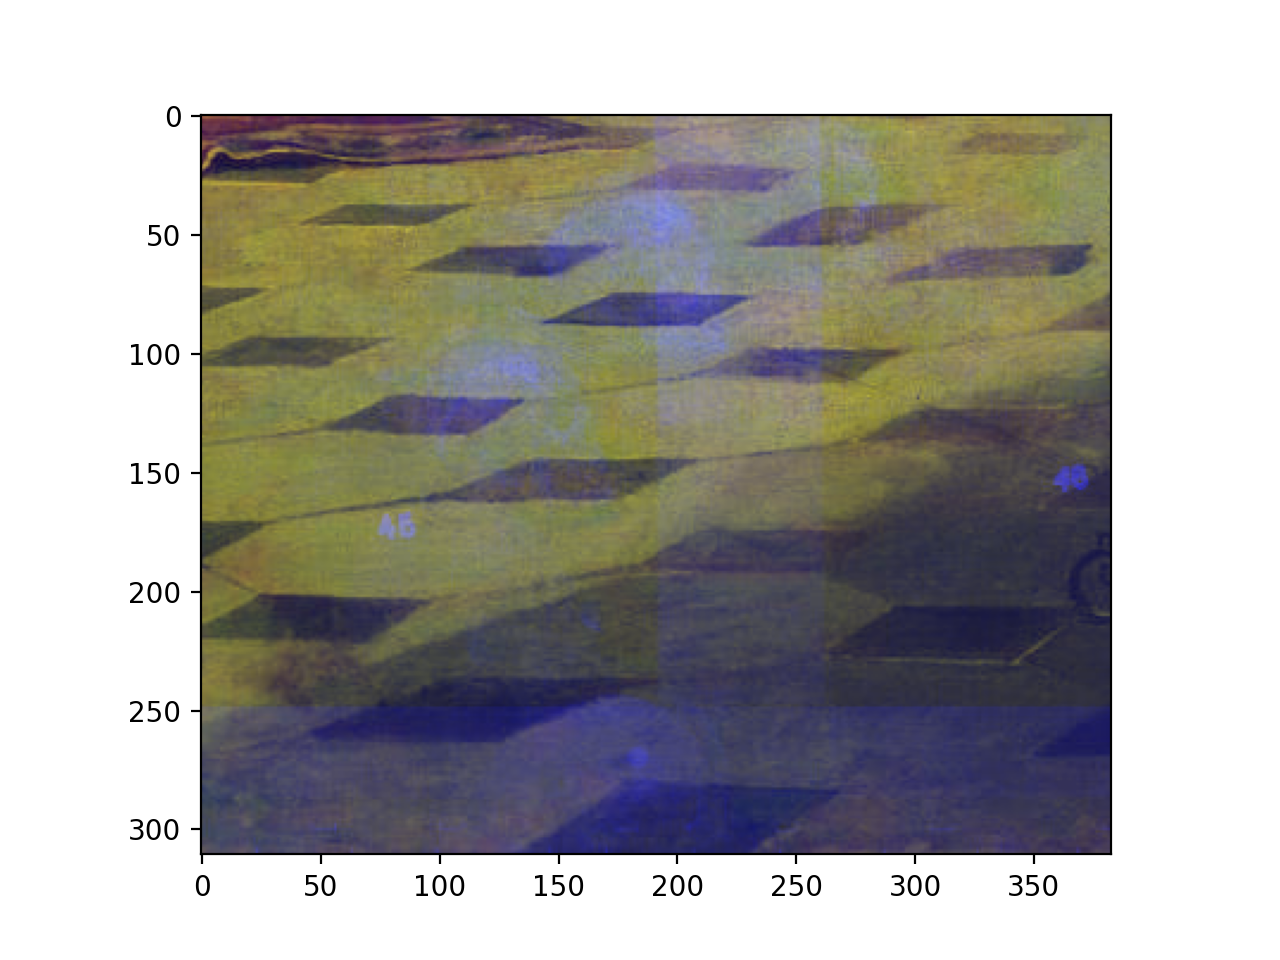

In [83]:
import matplotlib.pyplot as plt
falsecolor = data[:,:,[0,1,3]]
plt.imshow(falsecolor)

Or compute a Principal Component Analysis:

<IPython.core.display.Javascript object>


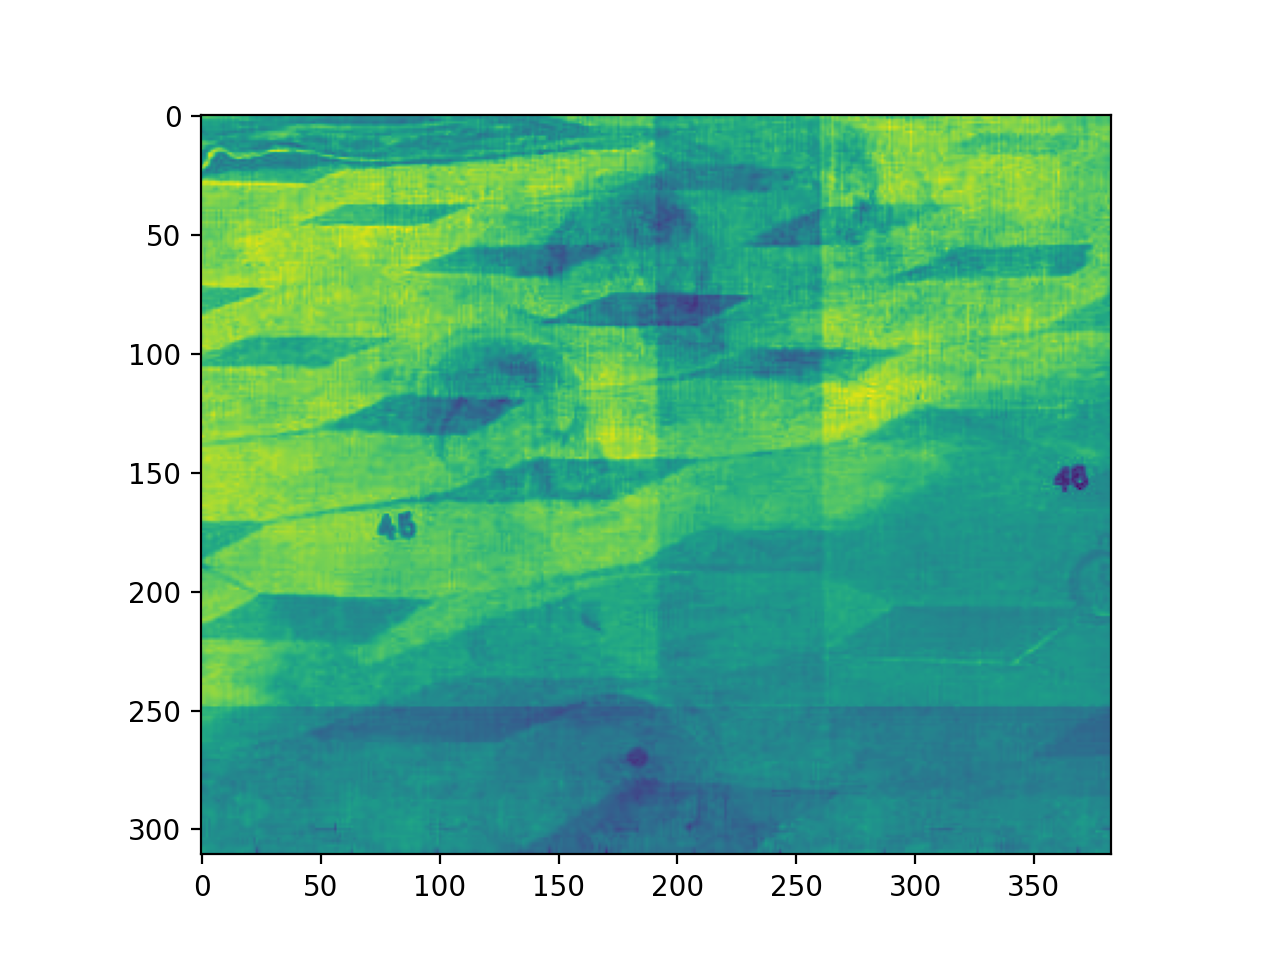

In [84]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=4)
g = data.reshape(data.shape[0]*data.shape[1],data.shape[2]).T
faces_pca.fit(g)
components = faces_pca.transform(g)
projected = faces_pca.inverse_transform(components)
plt.imshow(faces_pca.components_[0].reshape(data.shape[0],data.shape[1]))